Data Preprocessing

In [23]:
import pandas as pd
rain = pd.read_csv('../../data/auckland_rain_temp_statsNZcombineNoaaData.csv', parse_dates=['Date'])
rain.head()

,Date,Rainfall(mm),Tavg,Tmax,Tmin
0,1966-01-01,0.0,18.0,22.2,13.9
1,1966-01-02,26.2,20.5,23.9,17.1
2,1966-01-03,0.0,20.3,23.5,17.1
3,1966-01-04,0.0,20.3,24.4,16.2
4,1966-01-05,1.3,20.6,23.4,17.8


In [24]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21096 entries, 0 to 21095
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21096 non-null  datetime64[ns]
 1   Rainfall(mm)  21096 non-null  float64       
 2   Tavg          21096 non-null  float64       
 3   Tmax          21059 non-null  float64       
 4   Tmin          21014 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 824.2 KB


In [25]:
rain.isnull().sum()


Date             0
Rainfall(mm)     0
Tavg             0
Tmax            37
Tmin            82
dtype: int64

In [26]:
rain['Tmax'].interpolate(method='linear', inplace=True, limit_direction='both')
rain['Tmin'].interpolate(method='linear', inplace=True, limit_direction='both')

# Checking for Remaining Missing Values
missing_values = rain.isna().sum()
print(missing_values)

Date            0
Rainfall(mm)    0
Tavg            0
Tmax            0
Tmin            0
dtype: int64


In [27]:
rain.head()


,Date,Rainfall(mm),Tavg,Tmax,Tmin
0,1966-01-01,0.0,18.0,22.2,13.9
1,1966-01-02,26.2,20.5,23.9,17.1
2,1966-01-03,0.0,20.3,23.5,17.1
3,1966-01-04,0.0,20.3,24.4,16.2
4,1966-01-05,1.3,20.6,23.4,17.8


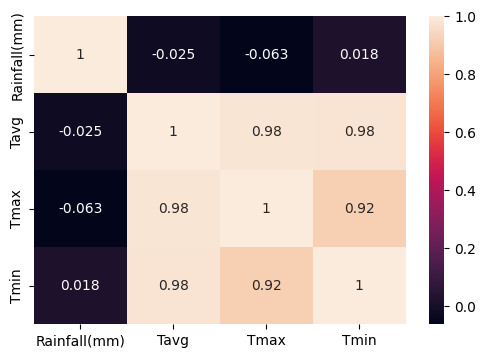

In [28]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Heatmap for correlation between variables
rain_1966_2023 = rain.set_index('Date')
# Select only the numeric columns from the 'weather' DataFrame


plt.figure(figsize=(6, 4))
sns.heatmap(rain_1966_2023.corr(), annot=True)
plt.show()

<Axes: xlabel='Date'>

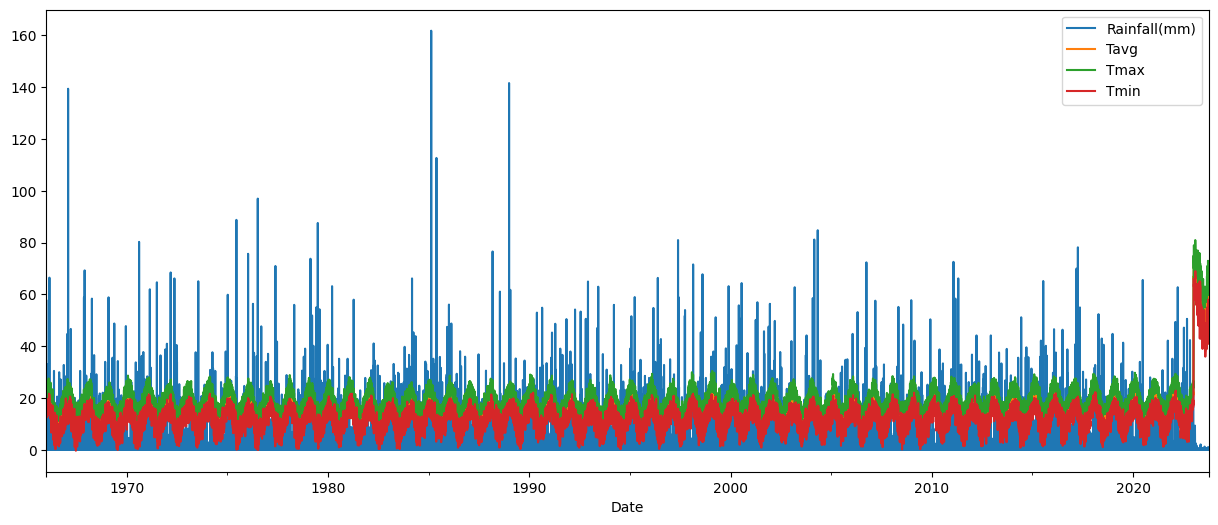

In [29]:
rain_1966_2023.plot(figsize=(15, 6))

In [30]:
rain_1966_2023.describe()

,Rainfall(mm),Tavg,Tmax,Tmin
count,21096.000000,21096.000000,21096.000000,21096.000000
mean,2.980838,16.045985,19.637955,12.448071
std,7.263680,6.318636,6.716051,6.158920
min,0.000000,5.000000,8.100000,-0.300000
25%,0.000000,12.600000,15.900000,9.200000
50%,0.010000,15.400000,18.800000,12.200000
75%,2.500000,18.600000,22.200000,15.100000
max,161.800000,72.000000,81.000000,69.000000


In [31]:
rain_1966_2023.head()

,Rainfall(mm),Tavg,Tmax,Tmin
Date,,,,
1966-01-01,0.0,18.0,22.2,13.9
1966-01-02,26.2,20.5,23.9,17.1
1966-01-03,0.0,20.3,23.5,17.1
1966-01-04,0.0,20.3,24.4,16.2
1966-01-05,1.3,20.6,23.4,17.8


# Lag Features

In [32]:
lag_size = 7

# Create lag features for 'Rainfall (mm)'
for i in range(1, lag_size + 1):
    rain_1966_2023[f'Rainfall_lag_{i}'] = rain_1966_2023['Rainfall(mm)'].shift(i)

for i in range(1, lag_size + 1):
    rain_1966_2023[f'Tavg_lag_{i}'] = rain_1966_2023['Tavg'].shift(i)
    
for i in range(1, lag_size + 1):
    rain_1966_2023[f'Tmax_lag_{i}'] = rain_1966_2023['Tmax'].shift(i)
    
for i in range(1, lag_size + 1):
    rain_1966_2023[f'Tmin_lag_{i}'] = rain_1966_2023['Tmin'].shift(i)

rain_1966_2023.dropna(inplace=True)  # Drop rows with NaN values in the lag features

# Split Data

In [33]:
rain_1966_2023.columns


Index(['Rainfall(mm)', 'Tavg', 'Tmax', 'Tmin', 'Rainfall_lag_1',
       'Rainfall_lag_2', 'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5',
       'Rainfall_lag_6', 'Rainfall_lag_7', 'Tavg_lag_1', 'Tavg_lag_2',
       'Tavg_lag_3', 'Tavg_lag_4', 'Tavg_lag_5', 'Tavg_lag_6', 'Tavg_lag_7',
       'Tmax_lag_1', 'Tmax_lag_2', 'Tmax_lag_3', 'Tmax_lag_4', 'Tmax_lag_5',
       'Tmax_lag_6', 'Tmax_lag_7', 'Tmin_lag_1', 'Tmin_lag_2', 'Tmin_lag_3',
       'Tmin_lag_4', 'Tmin_lag_5', 'Tmin_lag_6', 'Tmin_lag_7'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
features = ['Tavg', 'Tmax', 'Tmin', 'Rainfall(mm)',
       'Rainfall_lag_2', 'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5',
       'Rainfall_lag_6', 'Rainfall_lag_7', 'Tavg_lag_1', 'Tavg_lag_2',
       'Tavg_lag_3', 'Tavg_lag_4', 'Tavg_lag_5', 'Tavg_lag_6', 'Tavg_lag_7',
       'Tmax_lag_1', 'Tmax_lag_2', 'Tmax_lag_3', 'Tmax_lag_4', 'Tmax_lag_5',
       'Tmax_lag_6', 'Tmax_lag_7', 'Tmin_lag_1', 'Tmin_lag_2', 'Tmin_lag_3',
       'Tmin_lag_4', 'Tmin_lag_5', 'Tmin_lag_6', 'Tmin_lag_7']

X = rain_1966_2023[features]

y = rain_1966_2023['Rainfall_lag_1']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the shape of X_scaled and y
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)

# Check for NaN or missing values
print("NaN or missing values in X_scaled:", pd.DataFrame(X_scaled).isnull().sum().sum())
print("NaN or missing values in y:", y.isnull().sum())

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Temporal split
# train_end_date = '2000-12-31'
# X_train = X[X.index <= train_end_date]
# y_train = y[y.index <= train_end_date]
# X_test = X[X.index > train_end_date]
# y_test = y[y.index > train_end_date]

X_scaled shape: (21089, 31)
y shape: (21089,)
NaN or missing values in X_scaled: 0
NaN or missing values in y: 0


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = X.columns

# Sort features based on importance
sorted_idx = feature_importances.argsort()[::-1]

# Print feature importance ranking
print("Feature ranking:")
for f in range(len(sorted_idx)):
    print(f"{f + 1}. Feature '{feature_names[sorted_idx[f]]}' ({feature_importances[sorted_idx[f]]})")


Feature ranking:
1. Feature 'Rainfall(mm)' (0.1019460444942718)
2. Feature 'Rainfall_lag_2' (0.05913745231579017)
3. Feature 'Tmin_lag_1' (0.05535924347896467)
4. Feature 'Tmin' (0.05342760002440544)
5. Feature 'Tmax' (0.05302233255327018)
6. Feature 'Tmax_lag_1' (0.04993885659777836)
7. Feature 'Tmax_lag_2' (0.03511313192213678)
8. Feature 'Tmin_lag_2' (0.032705708019103795)
9. Feature 'Tavg' (0.03202002517693341)
10. Feature 'Tmax_lag_3' (0.030447390861548698)
11. Feature 'Tmin_lag_7' (0.02957893303372989)
12. Feature 'Tmin_lag_6' (0.02922075591483144)
13. Feature 'Tmin_lag_5' (0.028828193820740186)
14. Feature 'Tmin_lag_4' (0.027771978437777452)
15. Feature 'Tmax_lag_5' (0.027728149244727454)
16. Feature 'Tmax_lag_7' (0.027703590621140837)
17. Feature 'Tmax_lag_4' (0.0274892334055835)
18. Feature 'Tavg_lag_1' (0.026710290594191402)
19. Feature 'Tmin_lag_3' (0.02553067809944599)
20. Feature 'Tavg_lag_4' (0.024160801575625595)
21. Feature 'Rainfall_lag_7' (0.02400343003411033)
22. Fea

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Make predictions on the training set
rf_predictions_train = rf_model.predict(X_train)

# Make predictions on the test set
rf_predictions_test = rf_model.predict(X_test)

# Calculate RMSE for training set
rmse_train = sqrt(mean_squared_error(y_train, rf_predictions_train))

# Calculate MAE for training set
mae_train = mean_absolute_error(y_train, rf_predictions_train)

# Calculate MSE for training set
mse_train = mean_squared_error(y_train, rf_predictions_train)

# Calculate R2 score for training set
r2_train = r2_score(y_train, rf_predictions_train)

# Print the metrics for the training set
print("Random Foreset Training Set Metrics:")
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)
print("R2 Score:", r2_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, rf_predictions))

# Calculate MAE
mae = mean_absolute_error(y_test, rf_predictions)

# Calculate MSE
mse = mean_squared_error(y_test, rf_predictions)

# Calculate R2 score
r2 = r2_score(y_test, rf_predictions)

# Print the metrics
print("Random Foreset Root Mean Squared Error (RMSE):", rmse)
print("Random Foreset Mean Absolute Error (MAE):", mae)
print("Random Foreset Mean Squared Error (MSE):", mse)
print("Random Foreset R2 Score:", r2)

Random Foreset Training Set Metrics:
Root Mean Squared Error (RMSE): 2.596637398666156
Mean Absolute Error (MAE): 1.321005666528362
Mean Squared Error (MSE): 6.74252578015174
R2 Score: 0.8745615417844729
Random Foreset Root Mean Squared Error (RMSE): 6.495835533195975
Random Foreset Mean Absolute Error (MAE): 3.4926616168800377
Random Foreset Mean Squared Error (MSE): 42.19587927433143
Random Foreset R2 Score: 0.1340439306614467


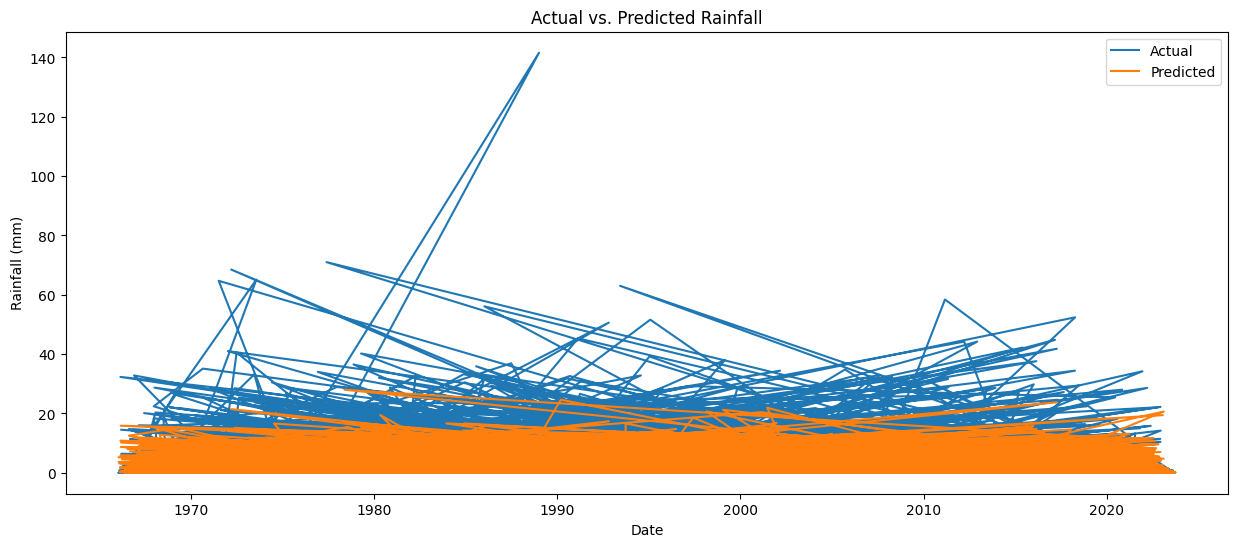

In [47]:
import matplotlib.pyplot as plt
X_test_df = pd.DataFrame(X_test, index=y_test.index, columns=features)

plt.figure(figsize=(15, 6))
plt.plot(X_test_df.index, y_test, label='Actual')
plt.plot(X_test_df.index, rf_predictions, label='Predicted')
plt.title('Actual vs. Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()


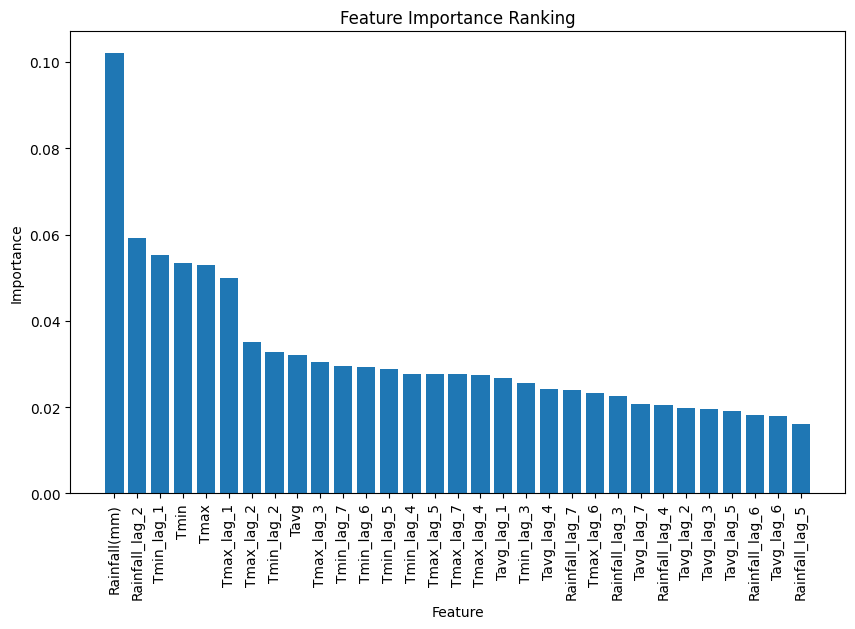

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking')
plt.show()

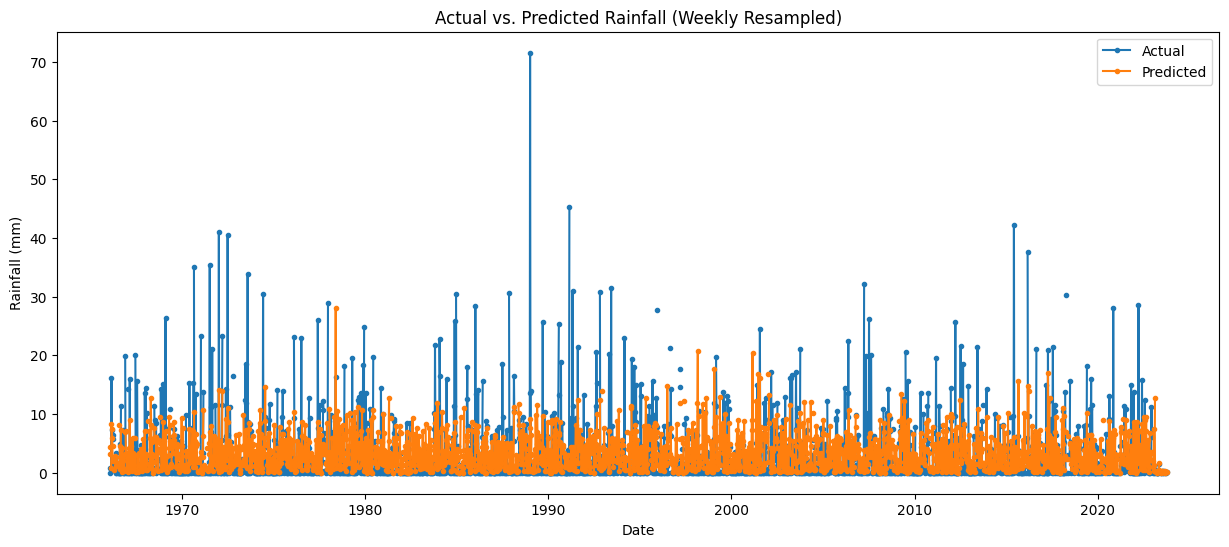

In [49]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions}, index=X_test_df.index)

# Resample data to a weekly frequency
result_df_weekly = result_df.resample('W').mean()

# Plotting actual vs. predicted values using subplots
fig, ax = plt.subplots(figsize=(15, 6))

# Use result_df_weekly.index to ensure consistency
ax.plot(result_df_weekly.index, result_df_weekly['Actual'], label='Actual', marker='.')
ax.plot(result_df_weekly.index, result_df_weekly['Predicted'], label='Predicted', marker='.')

ax.set_title('Actual vs. Predicted Rainfall (Weekly Resampled)')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall (mm)')
ax.legend()

plt.show()